# Can we test whether two samples come from the same distribution? 

## Set-up

Let $X$ and $Y$ be two random variables with probability density functions $f_X$ and $f_Y$. Let $(X_n)_{n=1}^k$ and $(Y_n)_{n=1}^k$ be samples from their respective distributions. Define their empirical density functions as $F_X$ and $F_Y$, respectively. 

## Kolmogorov-Smirnov Test
$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}$
For the purposes of this study, we work in the function space of essentially bounded measurable functions. Naturally, distributions belong to this function space. We define the Kolmogorov-Smirnov statistic, $D$, as $$D(F_X , F_Y) = \inf \{ C \in \mathbb{R} \, : \,  \norm{F_X - F_Y}_\infty \leq C \}$$

where $$\norm{F_X - F_Y}_\infty = \lim_{p \to \infty} \left( \int_S |F_X - F_Y|^p d \mu \right)^{\frac{1}{p}}$$ is the $L^\infty$ norm in our measurable space. We use this as a measure of proximity of our empirical cumulative distribution functions.


## Objective 

The purpose of this demo is to build a package which provides a data scientist with sufficient non-parametric tools to test whether two samples come from the same distribution. This package can be extrapolated to determine potential matches between unstructured variable names in different datasets.

In [17]:
# Import libraries

library(ggplot2)
library(gridExtra)
library(tibble)

In [8]:
# Generate two dataframes from same distributions

set.seed(260895)

#### DF1 ####
s1 <- runif(1000, 0, 100)
s2 <- runif(1000, 2, 99)
s3 <- rnorm(1000, 50, 30)
s4 <- rgamma(1000, 3,4)
s5 <- rexp(1000, 0.1)
s6 <- rchisq(1000, 10)

df1 <- data.frame(s1,s2,s3,s4,s5,s6)

#### DF2 ####
s7 <- runif(1000, 0, 100)
s8 <- runif(1000, 2, 99)
s9 <- rnorm(1000, 50, 30)
s10 <- rgamma(1000, 3,4)
s11 <- rexp(1000, 0.1)
s12 <- rchisq(1000, 10)

df2 <- data.frame(s7,s8,s9,s10,s11,s12)

In [9]:
head(df1)

s1       s2       s3       s4        s5        s6       
1 42.01435 28.75584 30.46025 0.3696270  6.308869 10.876349
2 79.59694 85.29435 67.92443 0.2835184 15.052036 12.273872
3 80.92999 47.04886 65.09650 0.7206412  3.434348  8.616554
4 85.36025 36.57907 44.13044 0.6839592  2.631345 12.364853
5 58.01206 50.47573 68.11600 0.5994406 11.085996  5.339710
6 46.34699 18.02133 23.45753 1.1013476  2.694827  8.819310

In [10]:
head(df2)

s7       s8       s9       s10       s11       s12      
1 37.99489 16.90441 27.79244 1.8159830  3.723253  9.934923
2 49.36198 12.33270 57.85522 0.4789388  5.621520  5.800487
3 53.44018 23.87125 48.19109 0.3265865 51.754290  6.578324
4 47.28862 28.53282 54.85032 0.4800547 40.687395 20.602624
5 23.25225 26.05764 73.08552 1.1641472  3.373123 14.175413
6 52.71499 33.79057 64.30341 0.3106893 21.315818  9.501930

In [12]:
####### Kolmogorov-Smirnov Statistic Matrix Function ####### 

extract.ks.D <- function(v1, v2) {
  ks <- ks.test(v1,v2)
  D <- ks$statistic
  return(D)
}


cartesian.ks <- function(df1, df2) {
  n1 <- ncol(df1)
  n2 <- ncol(df2)
  ks.mat <- matrix(ncol = n1, nrow = n2)
  
  for (i in 1:n1) {
    for (j in 1:n2) {
      d <- extract.ks.D(df1[,i], df2[,j])
      ks.mat[i,j] <- d
    }
  }
  return(ks.mat)
}

In [13]:
# Compare probability density functions function

compare.pdf <- function(var1, var2, group1 = "Group 1", group2 = "Group 2") {
  df1.var <- tibble(group = group1,
                     n = c(var1))
  
  df2.var <- tibble(group = group2,
                   n = c(var2))
  
  plt <- ggplot(rbind(df1.var,df2.var), aes(x=n, fill=group)) +
    geom_density(position='dodge', alpha=.5) + guides(fill=FALSE)
  
  plt
  return(plt)
}


pdf.matrix <- function(df1, df2, group1 = "Group 1", group2 = "Group 2") {
  n1 <- ncol(df1)
  n2 <- ncol(df2)
  plts <- list()
  counter <- 1
  for(i in 1:n1) {
    for(j in 1:n2) {
      plts[[counter]] <- compare.pdf(df1[,i], df2[,j], group1, group2)
      counter <- counter + 1
    }
  }
  do.call(grid.arrange,plts)
}

In [14]:
# Compare empirical cumulative density functions

compare.cdf <- function(var1, var2, group1 = "Group 1", group2 = "Group 2") {
  df1.var <- tibble(group = group1,
                    n = c(var1))
  
  df2.var <- tibble(group = group2,
                    n = c(var2))
  
  plt <- ggplot(rbind(df1.var,df2.var), aes(x=n, colour=group)) +
    stat_ecdf() + guides(colour=FALSE)
  
  plt
  return(plt)
}

cdf.matrix <- function(df1, df2, group1 = "Group 1", group2 = "Group 2") {
  n1 <- ncol(df1)
  n2 <- ncol(df2)
  plts <- list()
  counter <- 1
  for(i in 1:n1) {
    for(j in 1:n2) {
      plts[[counter]] <- compare.cdf(df1[,i], df2[,j], group1, group2)
      counter <- counter + 1
    }
  }
  do.call(grid.arrange,plts)
}

In [15]:
cartesian.ks(df1,df2)

[,1]  [,2]  [,3]  [,4]  [,5]  [,6] 
[1,] 0.040 0.032 0.061 0.980 0.682 0.790
[2,] 0.053 0.017 0.061 0.990 0.665 0.775
[3,] 0.070 0.078 0.062 0.932 0.730 0.829
[4,] 0.978 0.995 0.936 0.028 0.809 0.993
[5,] 0.660 0.660 0.699 0.806 0.033 0.316
[6,] 0.779 0.774 0.800 0.990 0.256 0.058

Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”Warning message:
“Width not defined. S

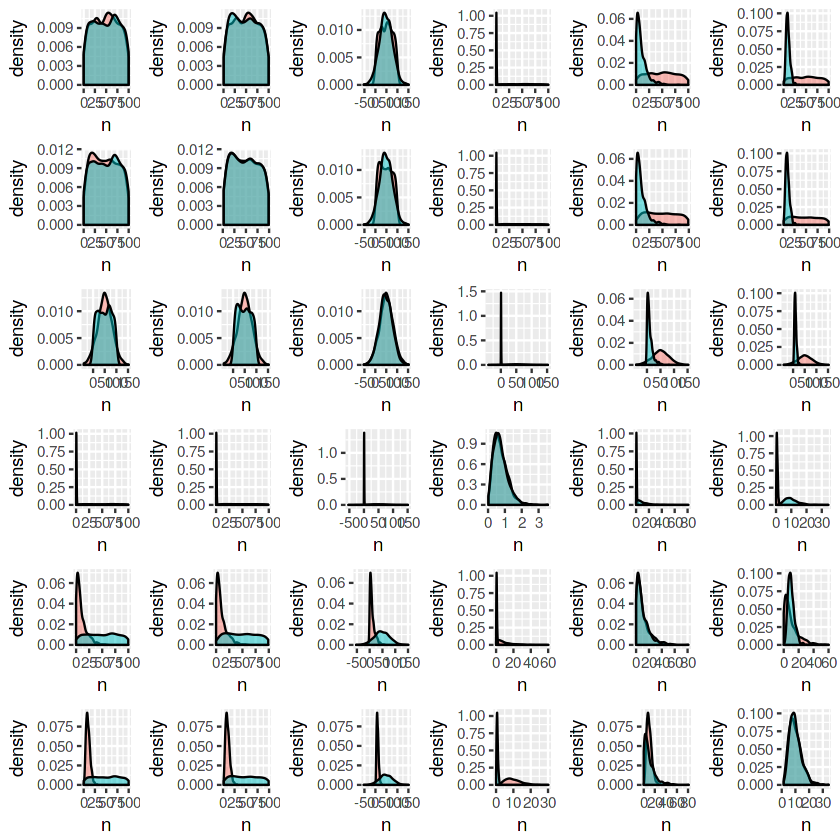

In [18]:
pdf.matrix(df1,df2)

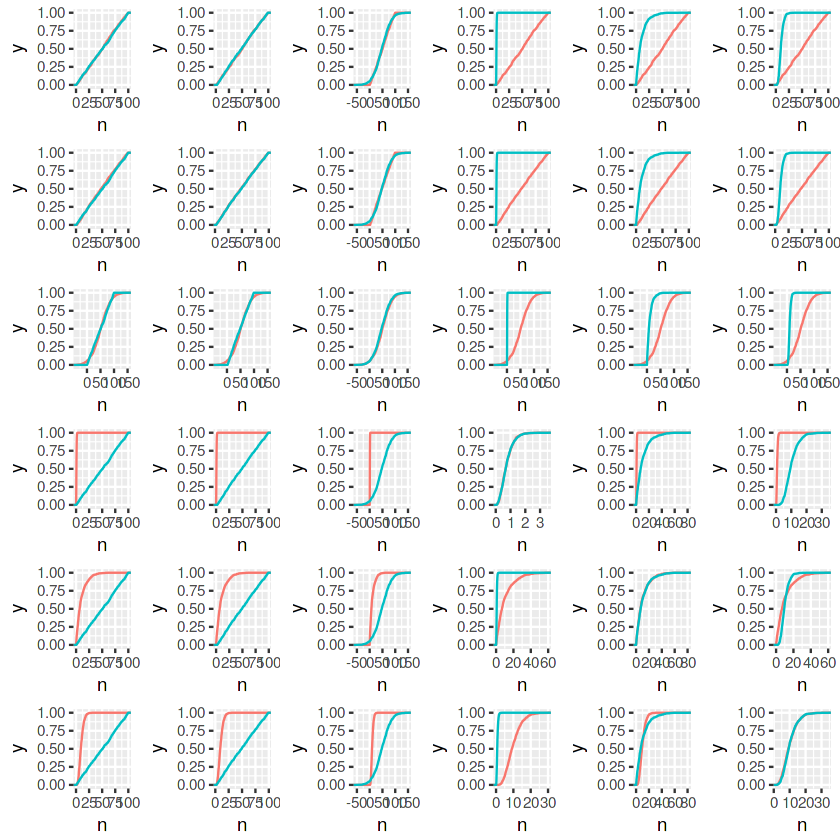

In [19]:
cdf.matrix(df1, df2)